<a href="https://colab.research.google.com/github/SafanaPsyche/Heart-Failure-Prediction-Using-ANN/blob/main/Heart_Failure_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectives of Notebook 📌**

👉 This notebook aims to:
   

1.   **Perform dataset exploration** using various types of data visualization.
2.   **Build various ML models** that can predict whether patients has disease or not.
3.   **Export prediction & best model** into csv file.



    

# **Machine Learning Modules 👨‍💻**
👉 The **models** used in this notebook:

1. K-Nearest Neighbour (KNN)
2. Support Vector Machine (SVM)
3. Logistic Regression
4. Gaussian Naive Bayes
5. Decision Tree
6. Random Forest
7. Extra Tree Classifier
8. Gradient Boosting
9. AdaBoost

# **Importing Libraries 📚**

In [1]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler


# --- Libraries Settings ---
pd.set_option("display.precision", 4)
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')



In [2]:
# --- Importing Dataset ---
df = pd.read_csv("/content/heart_failure_clinical_records.csv")

# --- Reading Dataset ---
df.head(10).style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75.0000,0,582,0,20,1,265000.0000,1.9000,130,1,0,4,1
55.0000,0,7861,0,38,0,263358.0300,1.1000,136,1,0,6,1
65.0000,0,146,0,20,0,162000.0000,1.3000,129,1,1,7,1
50.0000,1,111,0,20,0,210000.0000,1.9000,137,1,0,7,1
65.0000,1,160,1,20,0,327000.0000,2.7000,116,0,0,8,1
90.0000,1,47,0,40,1,204000.0000,2.1000,132,1,1,8,1
75.0000,1,246,0,15,0,127000.0000,1.2000,137,1,0,10,1
60.0000,1,315,1,60,0,454000.0000,1.1000,131,1,1,10,1
65.0000,0,157,0,65,0,263358.0300,1.5000,138,0,0,10,1
80.0000,1,123,0,35,1,388000.0000,9.4000,133,1,1,10,1


In [3]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 299
Total Columns: 13
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time 

In [4]:
# --- finding out the null values of the dataset --- 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

(None, None)

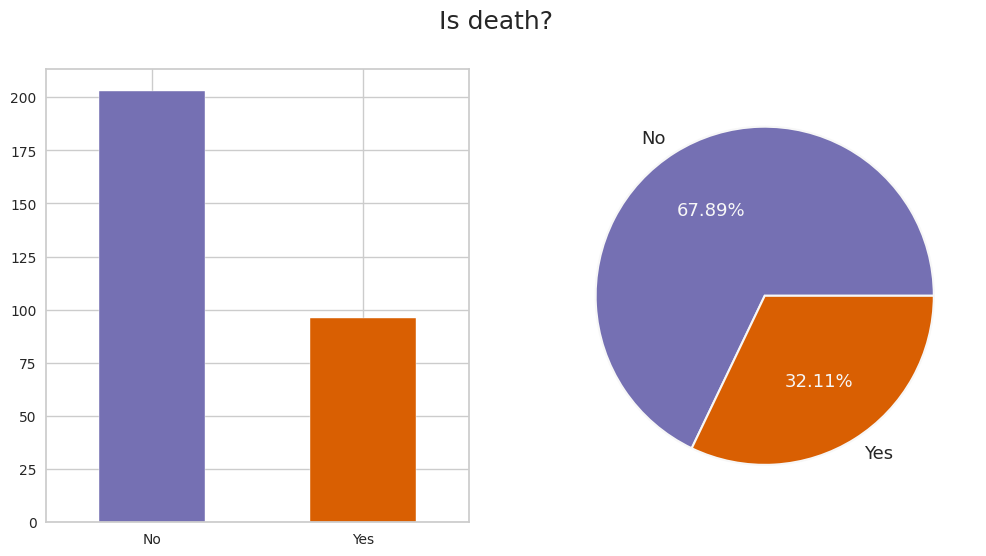

In [5]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
f.suptitle("Is death?", fontsize = 18.)
_ = df.DEATH_EVENT.value_counts().plot.bar(ax = ax[0], rot = 0, 
                                            color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.DEATH_EVENT.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", 
                                            label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), 
ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

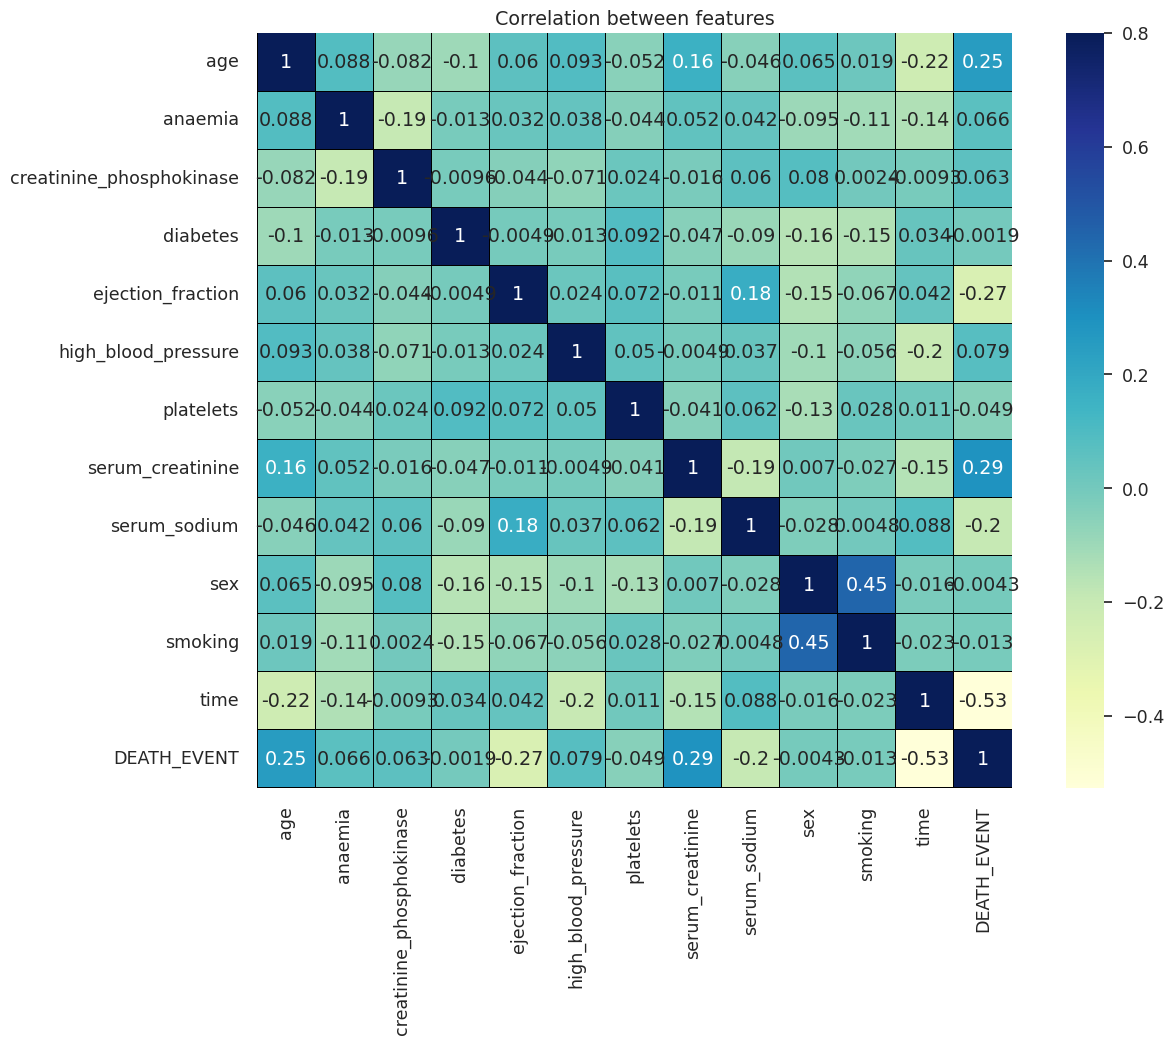

In [6]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

# **Multi label to binary label conversion**

In [7]:
X = df.iloc[:,0:-1]
y = df.iloc[:, -1]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


# **Splitting the data into train and test set**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# **Feature scaling**

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **Model Implementation 🛠**

👉 This section will implement various machine learning models as mentioned in Introduction section. In addition, explanation for each models will be discussed.



# **Training the Logistic Regression model**

**Logistic regression** is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name "logistic regression" is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.

In [10]:
# --- Applying Logistic Regression ---
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train, y_train)
# --- Predicting the test values ---
y_pred_lr = classifier_lr.predict(X_test)
# # --- Scoring ---
# acc_lr = accuracy_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)


In [11]:
# --- LR Accuracy ---
acc_lr = accuracy_score(y_pred_lr, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(acc_lr*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_lr))

.:. Logistic Regression Accuracy: 76.67% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.72      0.97      0.83        35
           1       0.92      0.48      0.63        25

    accuracy                           0.77        60
   macro avg       0.82      0.73      0.73        60
weighted avg       0.81      0.77      0.75        60




.: Performance Evaluation
**************************


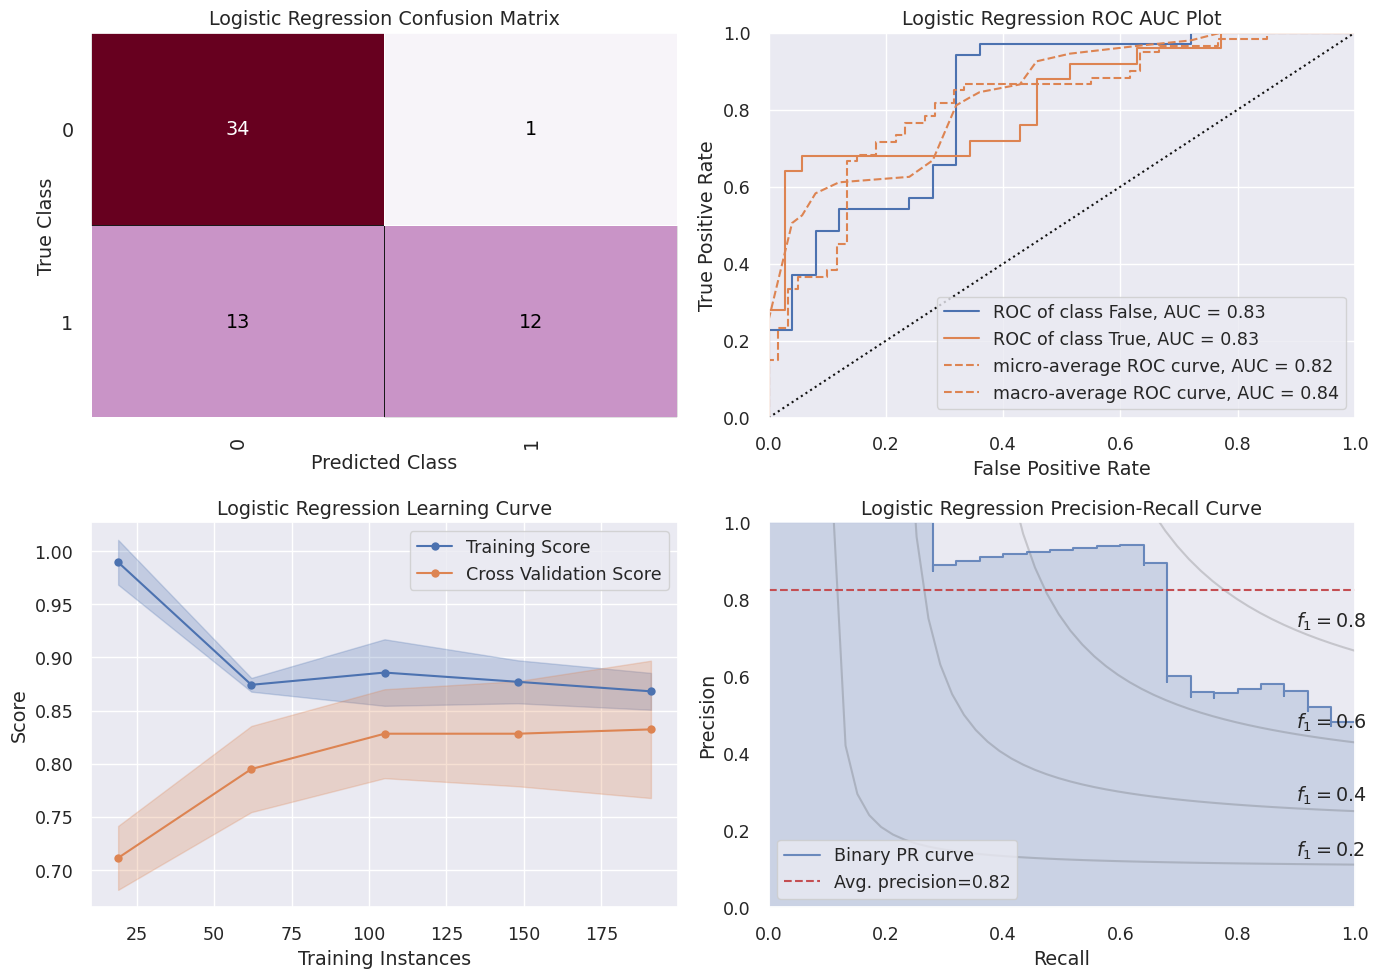

In [12]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(classifier_lr, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(classifier_lr, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(X_train, y_train)
logrocauc.score(X_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(classifier_lr, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(classifier_lr, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(X_train, y_train)
logcurve.score(X_test, y_test)
logcurve.finalize()

plt.tight_layout();

# **Training the K-Nearest Neighbour (KNN) model**

The **k-nearest neighbors (KNN)** algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The **k-nearest neighbor algorithm** is a type of supervised machine learning algorithm used to solve classification and regression problems.

It's called a lazy learning algorithm or lazy learner because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining..

In [13]:
"""
Power parameter for the Minkowski metric. 
When p = 1, this is equivalent to using manhattan_distance (l1), 
and euclidean_distance (l2) for p = 2. 
"""
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)

In [14]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

.:. K-Nearest Neighbour Accuracy: 70.00% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        35
           1       0.89      0.32      0.47        25

    accuracy                           0.70        60
   macro avg       0.78      0.65      0.63        60
weighted avg       0.76      0.70      0.66        60




.: Performance Evaluation
**************************


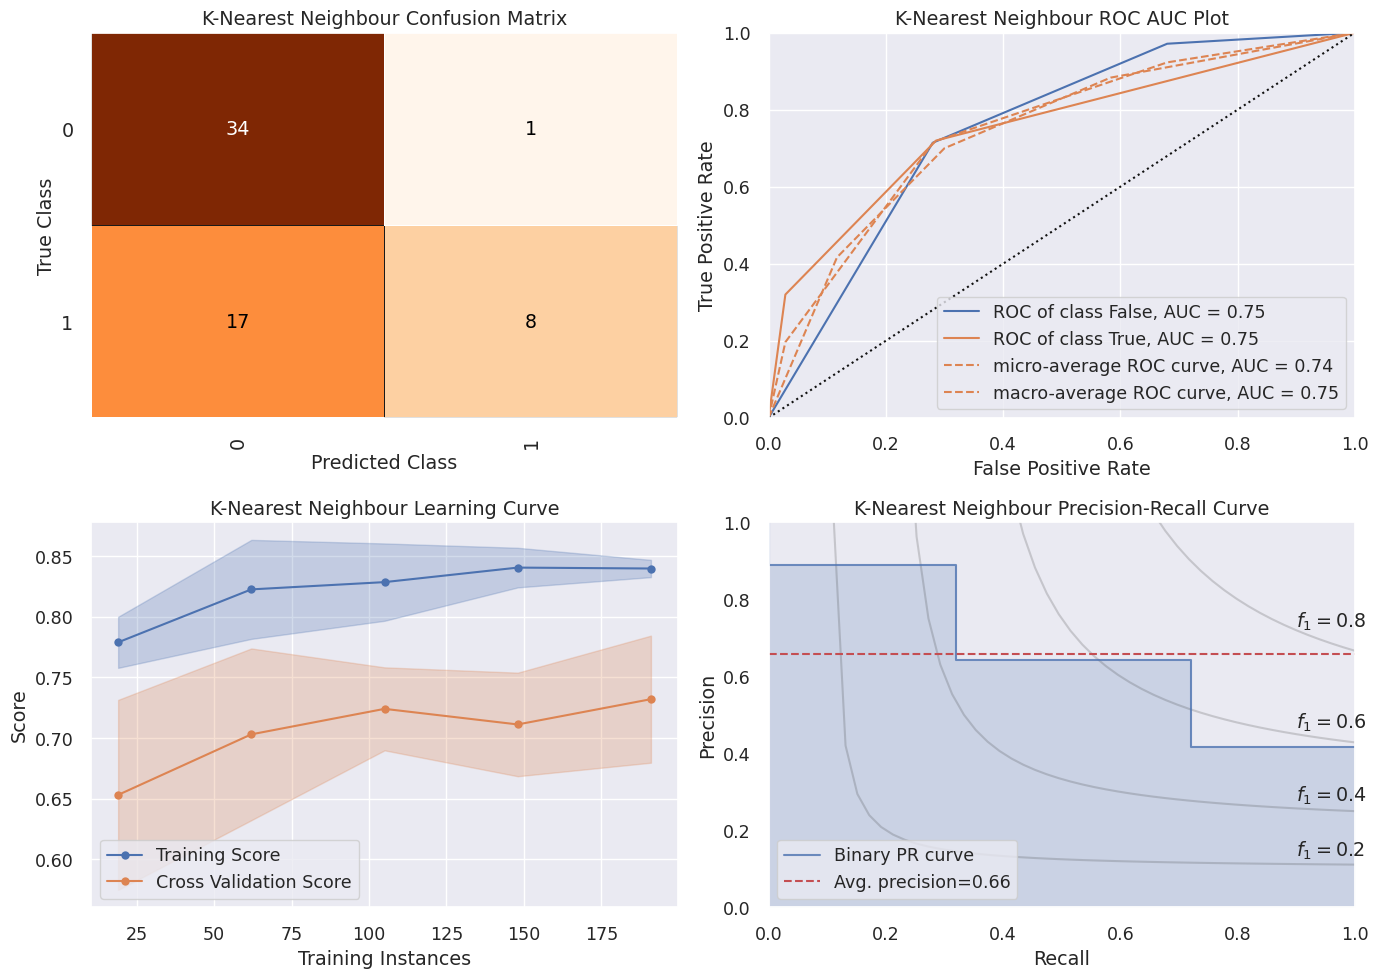

In [15]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='Oranges',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(X_train, y_train)
knnmatrix.score(X_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(X_train, y_train)
knnrocauc.score(X_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(X_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(X_train, y_train)
knncurve.score(X_test, y_test)
knncurve.finalize()

plt.tight_layout();

# **Support Vector Machine (SVM)**

**Support Vector Machine (SVM)** is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

**SVM** chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [16]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='rbf', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(X_train, y_train)

y_pred_SVM = SVMclassifier.predict(X_test)

In [17]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

.:. Support Vector Machine Accuracy: 71.67% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        35
           1       0.79      0.44      0.56        25

    accuracy                           0.72        60
   macro avg       0.74      0.68      0.68        60
weighted avg       0.73      0.72      0.70        60




.: Performance Evaluation
**************************


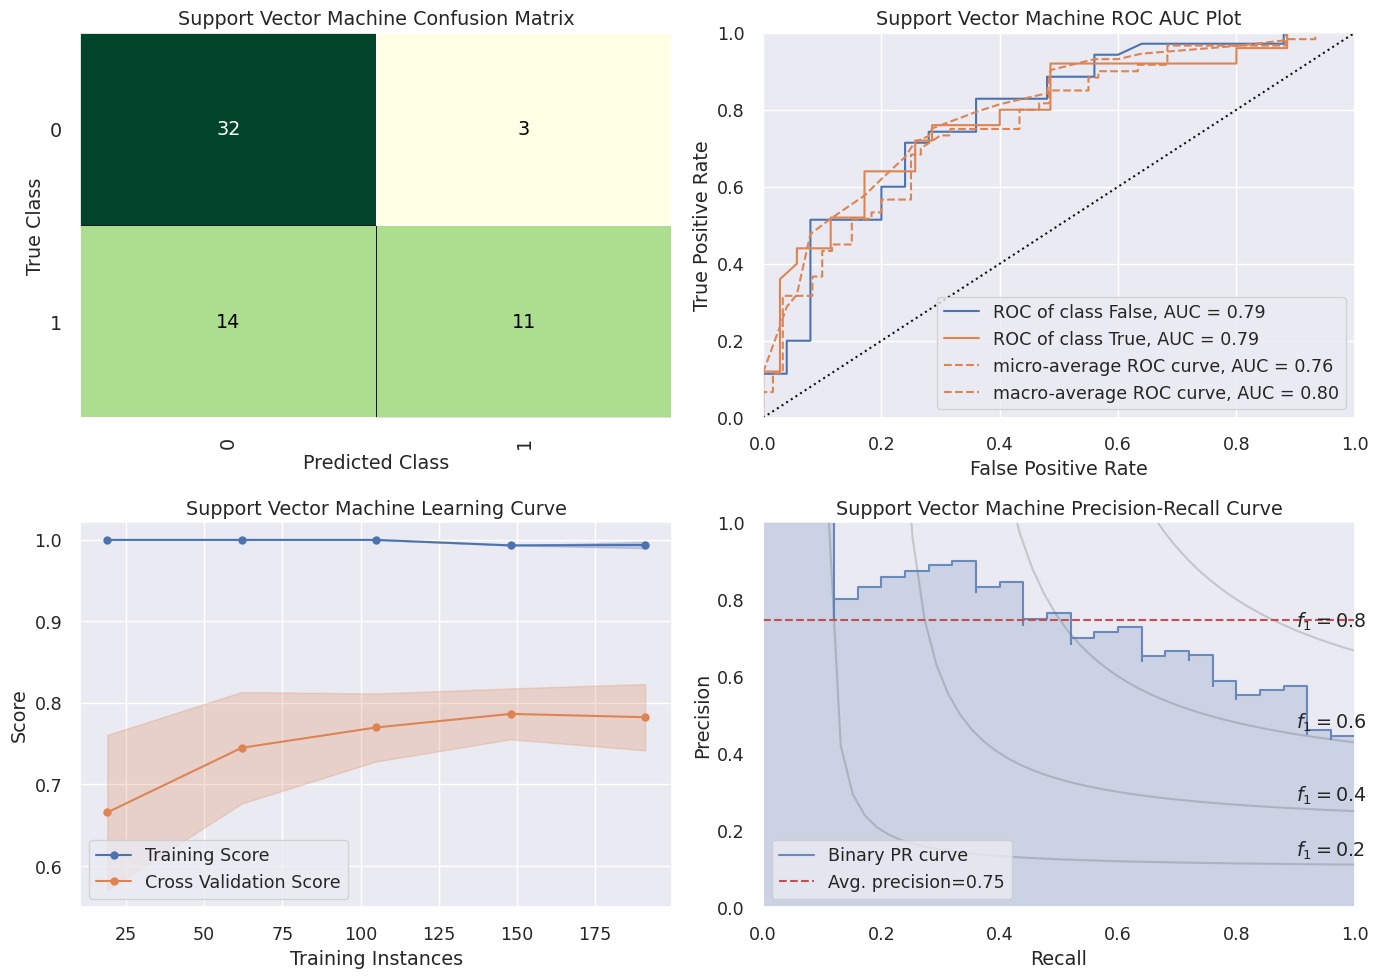

In [18]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='YlGn',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(X_train, y_train)
svmmatrix.score(X_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(X_train, y_train)
svmrocauc.score(X_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(X_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(X_train, y_train)
svmcurve.score(X_test, y_test)
svmcurve.finalize()

plt.tight_layout();

# **Gaussian Naive Bayes**

**Naive Bayes** Classifiers are based on the Bayes Theorem, which one assumption taken is the strong independence assumptions between the features. These classifiers assume that the value of a particular feature is independent of the value of any other feature. In a supervised learning situation, Naive Bayes Classifiers are trained very efficiently. Naive Bayes classifiers need a small training data to estimate the parameters needed for classification. Naive Bayes Classifiers have simple design and implementation and they can applied to many real life situations.

**Gaussian Naive Bayes** is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.

In [19]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, y_train)

y_pred_GNB = GNBclassifier.predict(X_test)

In [20]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

.:. Gaussian Naive Bayes Accuracy: 70.00% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        35
           1       0.89      0.32      0.47        25

    accuracy                           0.70        60
   macro avg       0.78      0.65      0.63        60
weighted avg       0.76      0.70      0.66        60




.: Performance Evaluation
**************************


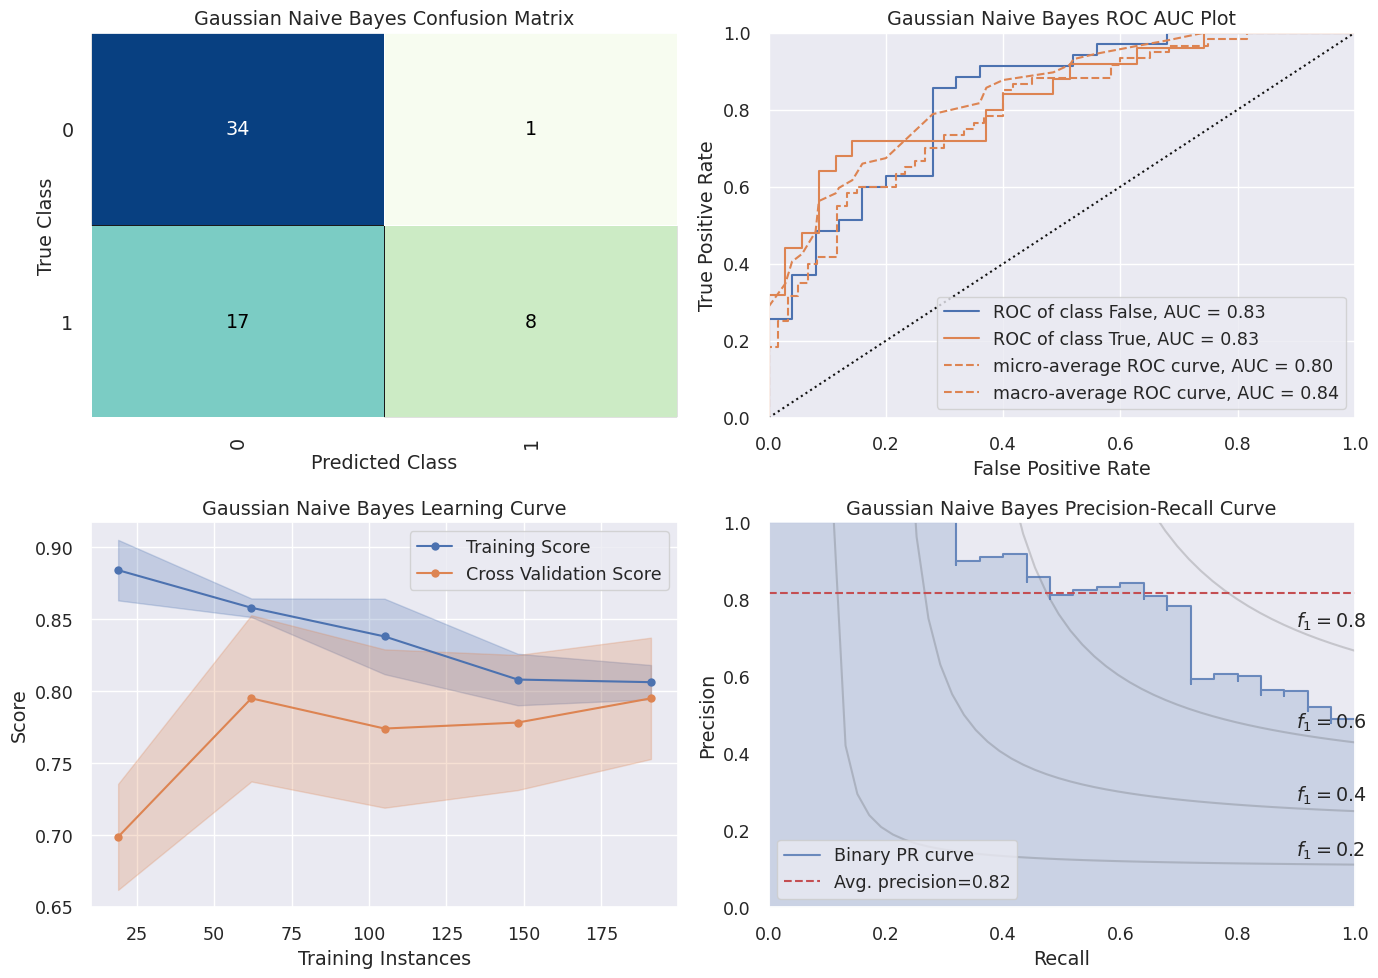

In [21]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='GnBu',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(X_train, y_train)
gnbmatrix.score(X_test, y_test)
gnbmatrix.finalize()

# --- GNB ROC AUC ---
gnbrocauc = ROCAUC(GNBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gaussian Naive Bayes ROC AUC Plot')
gnbrocauc.fit(X_train, y_train)
gnbrocauc.score(X_test, y_test)
gnbrocauc.finalize()

# --- GNB Learning Curve ---
gnblc = LearningCurve(GNBclassifier, ax=ax3, title='Gaussian Naive Bayes Learning Curve')
gnblc.fit(X_train, y_train)
gnblc.finalize()

# --- GNB Precision Recall Curve ---
gnbcurve = PrecisionRecallCurve(GNBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gaussian Naive Bayes Precision-Recall Curve')
gnbcurve.fit(X_train, y_train)
gnbcurve.score(X_test, y_test)
gnbcurve.finalize()

plt.tight_layout();

# **Decision Tree**

**Decision Tree** is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a **Decision tree**, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

In [22]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(X_train, y_train)
y_pred_DTC = DTCclassifier.predict(X_test)

In [23]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

.:. Decision Tree Accuracy: 71.67% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        35
           1       0.79      0.44      0.56        25

    accuracy                           0.72        60
   macro avg       0.74      0.68      0.68        60
weighted avg       0.73      0.72      0.70        60




.: Performance Evaluation
**************************


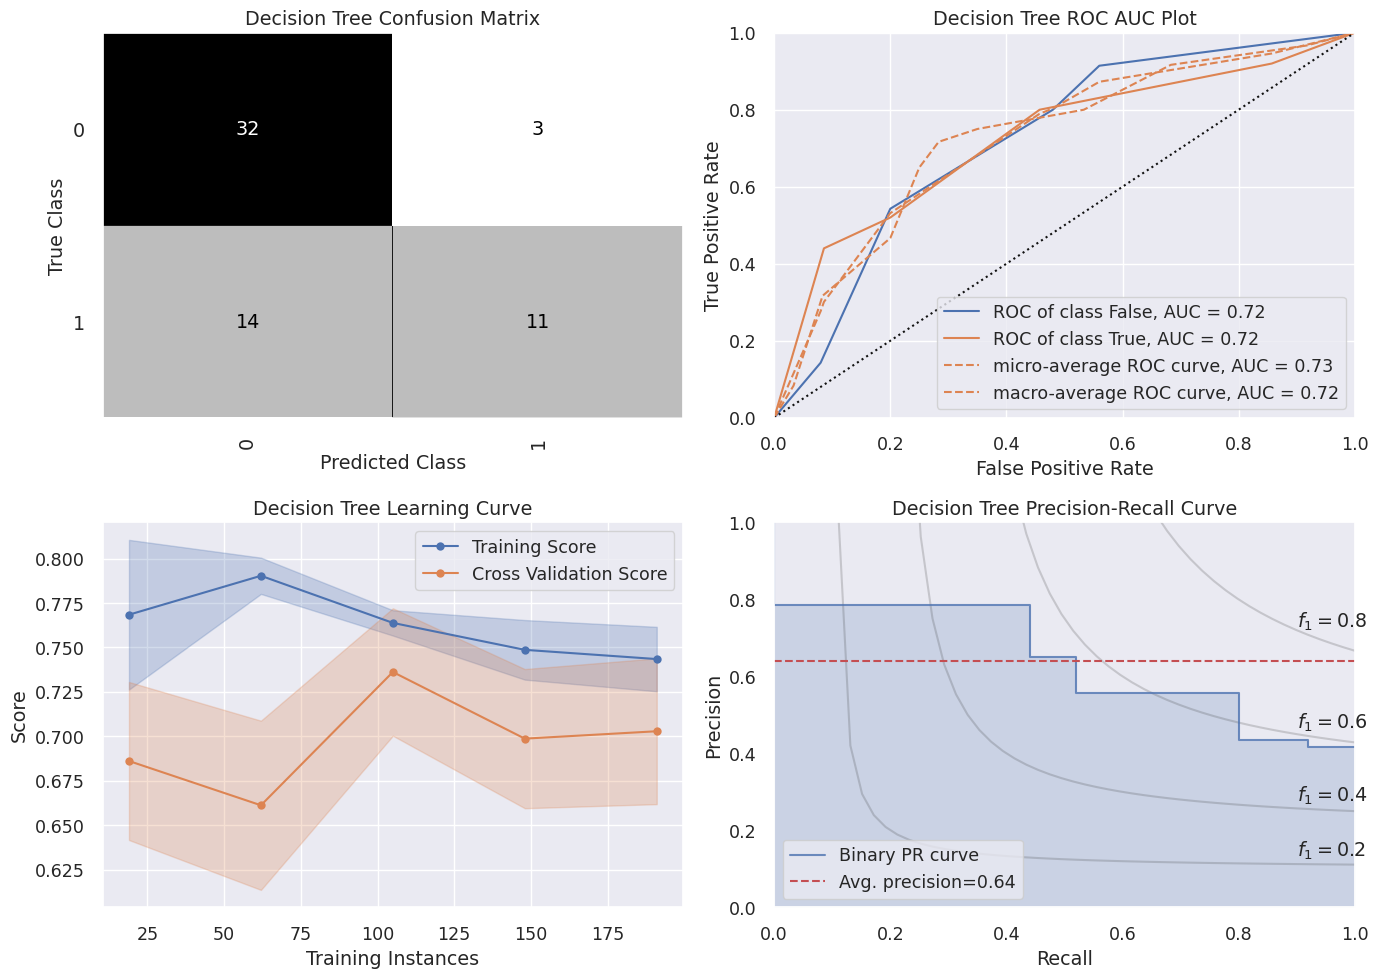

In [24]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='Greys',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(X_train, y_train)
dtcmatrix.score(X_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(X_train, y_train)
dtcrocauc.score(X_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(X_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(X_train, y_train)
dtccurve.score(X_test, y_test)
dtccurve.finalize()

plt.tight_layout();

# **Random Forest**

**Random Forest** is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

In [25]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)

In [26]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

.:. Random Forest Accuracy: 73.33% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60




.: Performance Evaluation
**************************


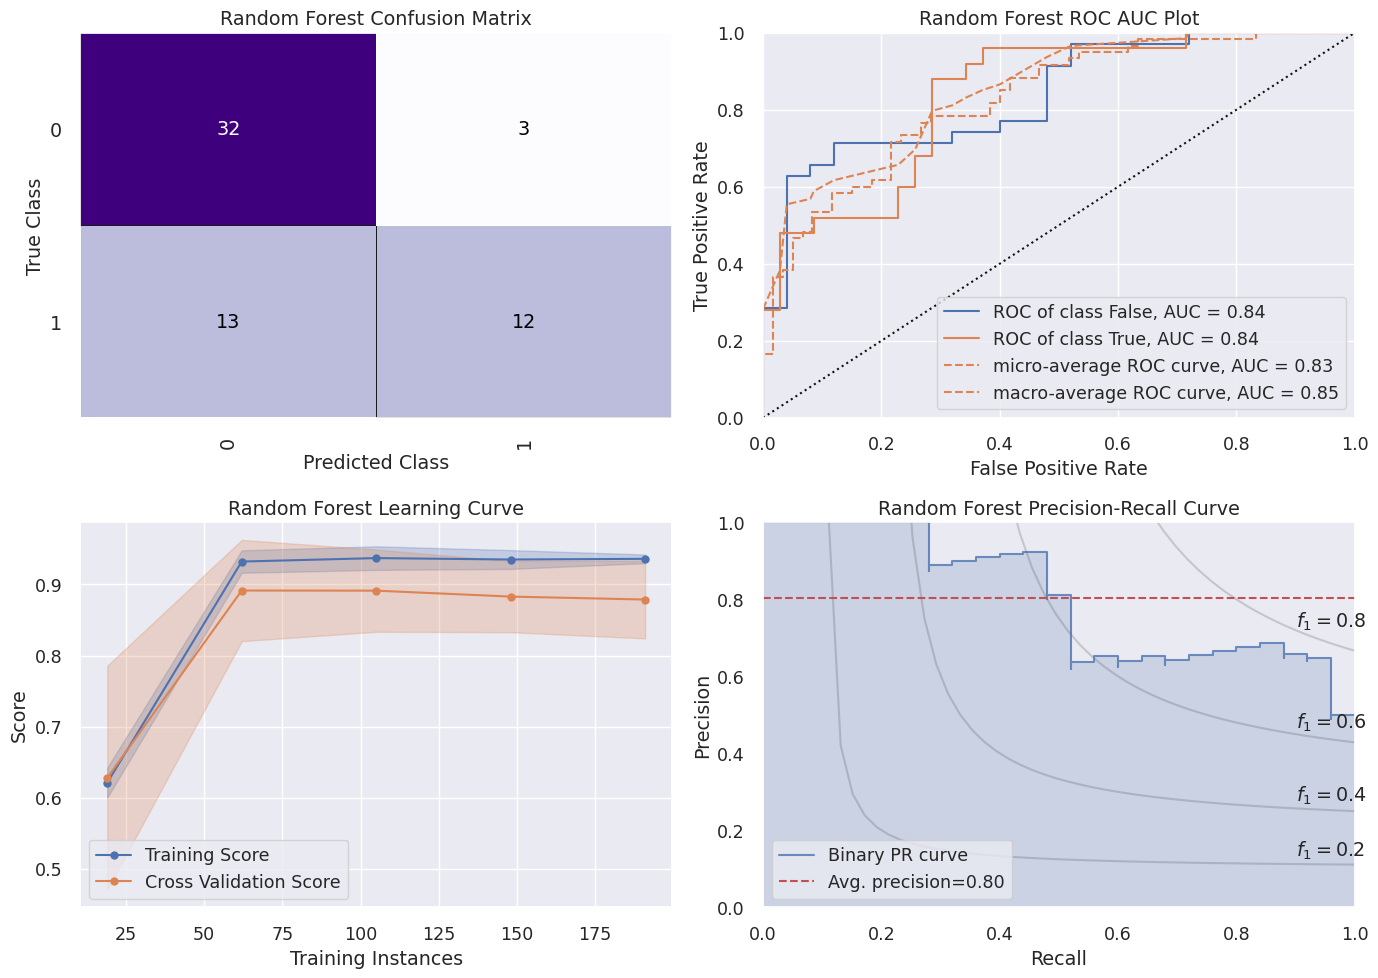

In [27]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='Purples',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train, y_train)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(X_train, y_train)
rccrocauc.score(X_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(X_train, y_train)
rcccurve.score(X_test, y_test)
rcccurve.finalize()

plt.tight_layout();

# **Extra Tree Classifier**

**Extra Trees Classifier** is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a "forest" to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.

In [28]:
# --- Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

ETclassifier.fit(X_train, y_train)
y_pred_ET = ETclassifier.predict(X_test)

In [29]:
# --- ET Accuracy ---
ETAcc = accuracy_score(y_pred_ET, y_test)
print('.:. Extra Tree Classifier Accuracy:'+'\033[1m {:.2f}%'.format(ETAcc*100)+' .:.')

# --- ET Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_ET))

.:. Extra Tree Classifier Accuracy: 68.33% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.66      0.94      0.78        35
           1       0.80      0.32      0.46        25

    accuracy                           0.68        60
   macro avg       0.73      0.63      0.62        60
weighted avg       0.72      0.68      0.64        60




.: Performance Evaluation
**************************


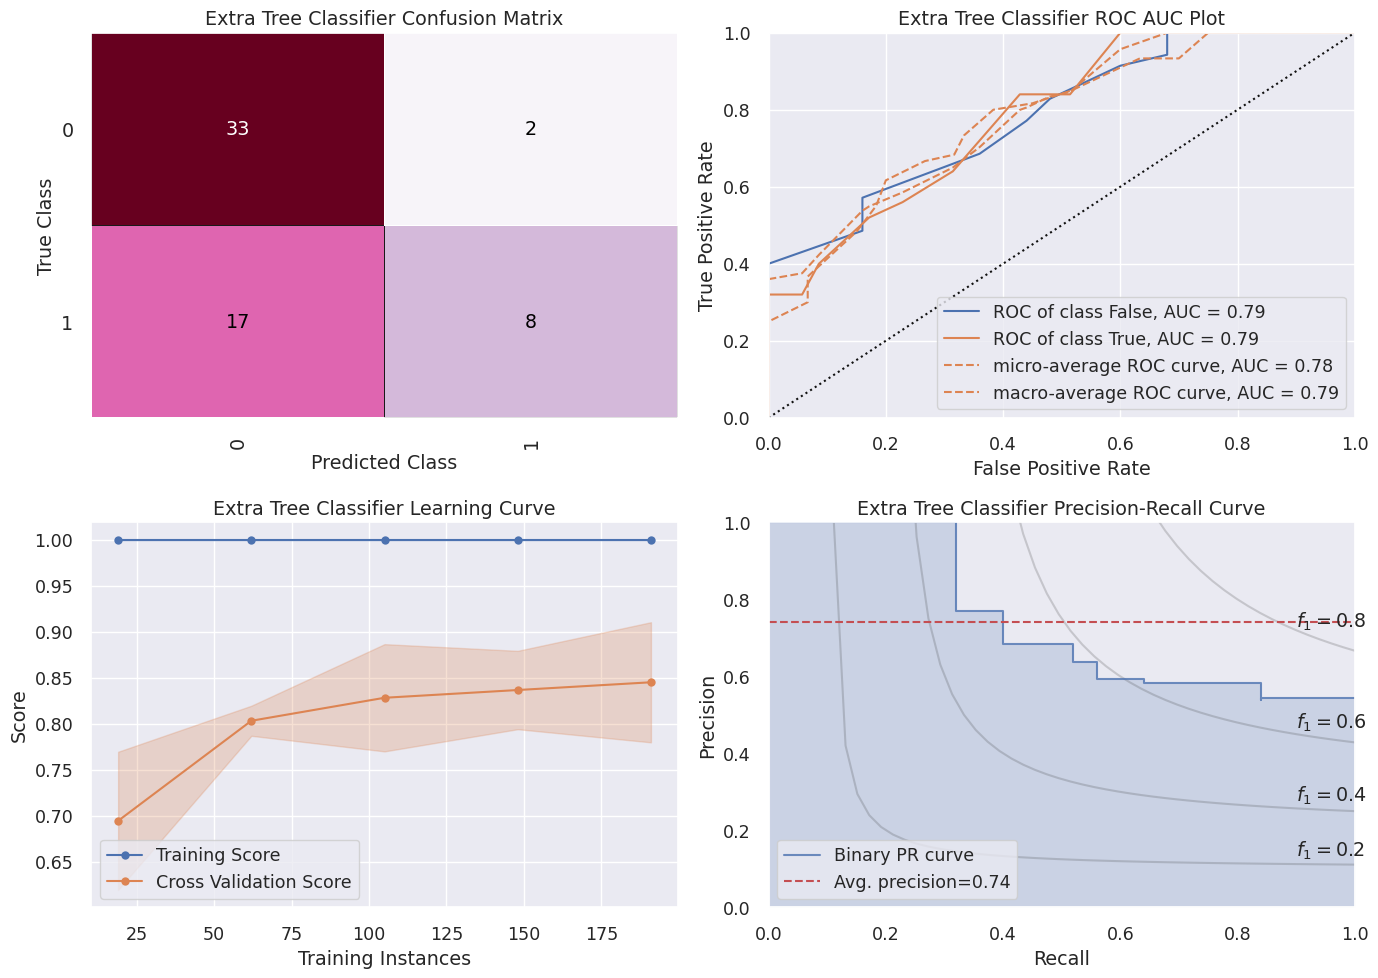

In [30]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- ET Confusion Matrix ---
etcmatrix = ConfusionMatrix(ETclassifier, ax=ax1, cmap='PuRd',
                            title='Extra Tree Classifier Confusion Matrix')
etcmatrix.fit(X_train, y_train)
etcmatrix.score(X_test, y_test)
etcmatrix.finalize()

# --- ET ROC AUC ---
etrocauc = ROCAUC(ETclassifier, classes=['False', 'True'], ax=ax2,
                  title='Extra Tree Classifier ROC AUC Plot')
etrocauc.fit(X_train, y_train)
etrocauc.score(X_test, y_test)
etrocauc.finalize()

# --- ET Learning Curve ---
etlc = LearningCurve(ETclassifier, ax=ax3, title='Extra Tree Classifier Learning Curve')
etlc.fit(X_train, y_train)
etlc.finalize()

# --- ET Precision Recall Curve ---
etpc = PrecisionRecallCurve(ETclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='Extra Tree Classifier Precision-Recall Curve')
etpc.fit(X_train, y_train)
etpc.score(X_test, y_test)
etpc.finalize()

plt.tight_layout();

# **Gradient Boosting**

**Boosting** is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. It strongly relies on the prediction that the next model will reduce prediction errors when blended with previous ones. The main idea is to establish target outcomes for this upcoming model to minimize errors.

**Gradient Boosting** trains many models in a gradual, additive and sequential manner. The term gradient boosting emerged because every case’s target outcomes are based on the gradient’s error with regards to the predictions. Every model reduces prediction errors by taking a step in the correct direction.

In [31]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(X_train, y_train)
y_pred_GB = GBclassifier.predict(X_test)

In [32]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

.:. Gradient Boosting Accuracy: 76.67% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60




.: Performance Evaluation
**************************


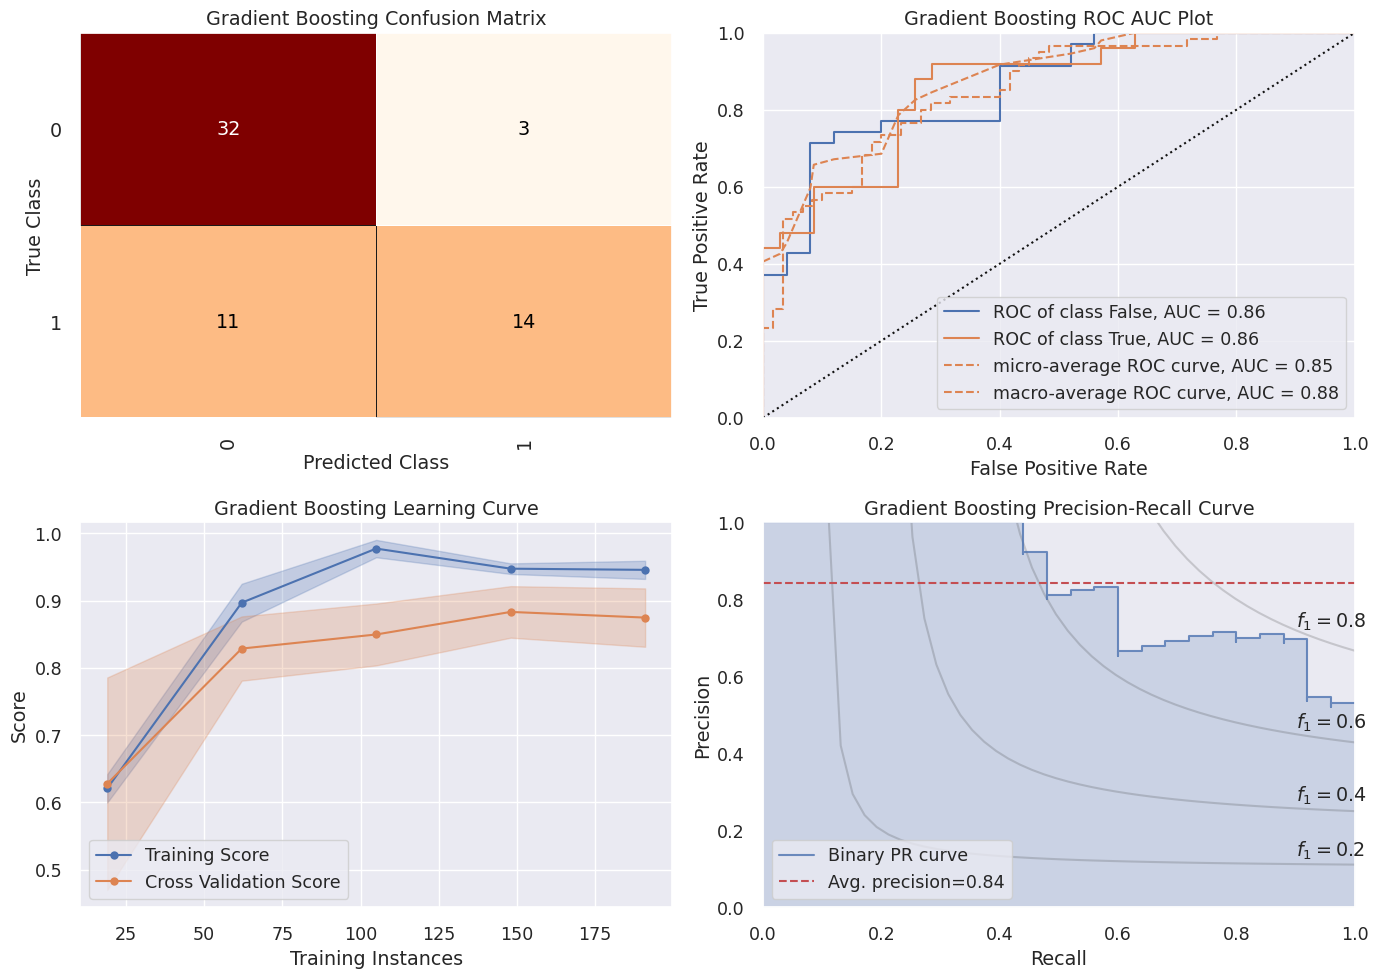

In [33]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='OrRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(X_train, y_train)
gbcmatrix.score(X_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(GBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(X_train, y_train)
gbcrocauc.score(X_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(GBclassifier, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(X_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(GBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(X_train, y_train)
gbcurve.score(X_test, y_test)
gbcurve.finalize()

plt.tight_layout();

# **AdaBoost**

**AdaBoost** also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is decision trees with one level that means with Decision trees with only 1 split. These trees are also called Decision Stumps. AdaBoost builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now, all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lowe error is received.

In [34]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)

In [35]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

.:. AdaBoost Accuracy: 80.00% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.81      0.68      0.74        25

    accuracy                           0.80        60
   macro avg       0.80      0.78      0.79        60
weighted avg       0.80      0.80      0.80        60




.: Performance Evaluation
**************************


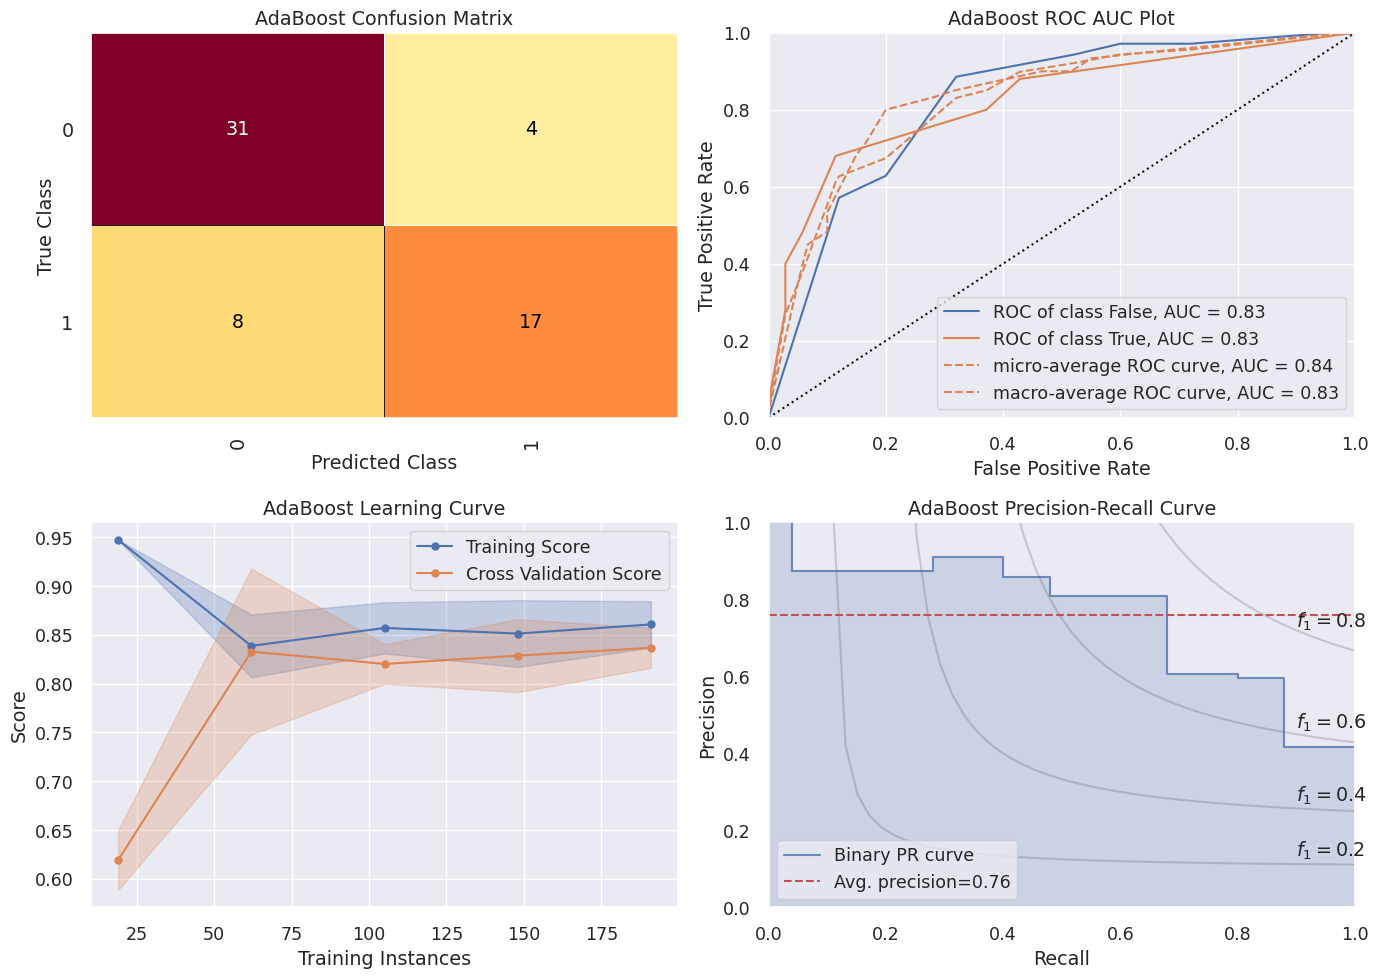

In [36]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='YlOrRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(X_train, y_train)
abcmatrix.score(X_test, y_test)
abcmatrix.finalize()

# --- AdaBoost ROC AUC ---
abrocauc = ROCAUC(ABclassifier, classes=['False', 'True'], ax=ax2,
                  title='AdaBoost ROC AUC Plot')
abrocauc.fit(X_train, y_train)
abrocauc.score(X_test, y_test)
abrocauc.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax3, title='AdaBoost Learning Curve')
ablc.fit(X_train, y_train)
ablc.finalize()

# --- AdaBoost Precision Recall Curve ---
abpc = PrecisionRecallCurve(ABclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='AdaBoost Precision-Recall Curve')
abpc.fit(X_train, y_train)
abpc.score(X_test, y_test)
abpc.finalize()

plt.tight_layout();

# **Model Comparison 👀**

👉 After implementing 9 models, this section will compare **machine learning models**.

In [37]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [acc_lr*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
AdaBoost,80.0000
Logistic Regression,76.6667
Gradient Boosting,76.6667
Random Forest,73.3333
Support Vector Machine,71.6667
Decision Tree,71.6667
K-Nearest Neighbour,70.0000
Gaussian Naive Bayes,70.0000
Extra Tree Classifier,68.3333
